In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
con = pd.read_csv('data/pre1_3.csv')

In [4]:
train = pd.read_csv('data/nlp_train.csv')

In [6]:
train = train[train.index >= 31943]
train = train[train.gname != 'Unknown']

data = pd.merge(train,con,on='eventid',how='left')

In [7]:
data.head()

,eventid,gname,nlp,faith,level_faith
0,201501010003,Shura Council of Benghazi Revolutionaries,LibyaMiddle East & North AfricaBenghaziBenghaz...,0.683212,3.0
1,201501010008,Islamic State of Iraq and the Levant (ISIL),IraqMiddle East & North AfricaNinevehTayaranNA...,0.452612,4.0
2,201501010009,Islamic State of Iraq and the Levant (ISIL),IraqMiddle East & North AfricaAl AnbarAl-Baghd...,0.683212,3.0
3,201501010010,Devrimici Halk Kurtulus Cephesi (DHKP/C),TurkeyMiddle East & North AfricaIstanbulIstanb...,0.683212,3.0
4,201501010012,Taliban,AfghanistanSouth AsiaKapisaKortasNAssassinatio...,0.453073,4.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22738 entries, 0 to 22737
Data columns (total 5 columns):
eventid        22738 non-null int64
gname          22738 non-null object
nlp            22738 non-null object
faith          22738 non-null float64
level_faith    22738 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB


In [8]:
#data.to_csv('data/pre2x2.csv', index=False)

In [9]:
df2 = data.groupby(by=['gname'])['faith'].sum()
data2 =pd.DataFrame({"gname":df2.index,"sum of faith":df2})

In [10]:
#data2.to_csv('data/pre2x2_2.csv', index=False)

In [11]:
data2.head()

,gname,sum of faith
gname,,
A'chik Matgrik Elite Force (AMEF),A'chik Matgrik Elite Force (AMEF),3.407644
Abbala extremists,Abbala extremists,3.188574
Abdul Ghani Kikli Militia,Abdul Ghani Kikli Militia,0.683414
Abu Abbas Brigade,Abu Abbas Brigade,0.683212
Abu Amarah Battalion,Abu Amarah Battalion,1.823821


^ 这里通过excel将表格降序了，得到了前5

In [14]:
from wordcloud import WordCloud, STOPWORDS
ISIL = train[train.gname=="Islamic State of Iraq and the Levant (ISIL)"]["nlp"].values
T  = train[train.gname=="Taliban"]["nlp"].values
AS = train[train.gname=="Al-Shabaab"]["nlp"].values
BH = train[train.gname=="Boko Haram"]["nlp"].values
AA = train[train.gname=="Houthi extremists (Ansar Allah)"]["nlp"].values

(-0.5, 399.5, 199.5, -0.5)

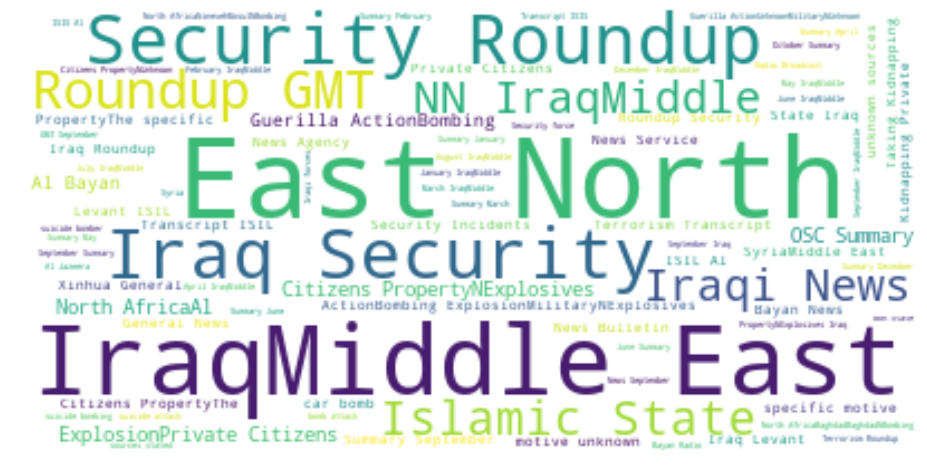

In [17]:
wc = WordCloud(background_color="white", max_words=5000,
               stopwords=STOPWORDS, max_font_size= 50)
# generate word cloud
wc.generate(" ".join(ISIL))

# show
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
#plt.title("Islamic State of Iraq and the Levant (ISIL)", fontsize=14,color='red')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

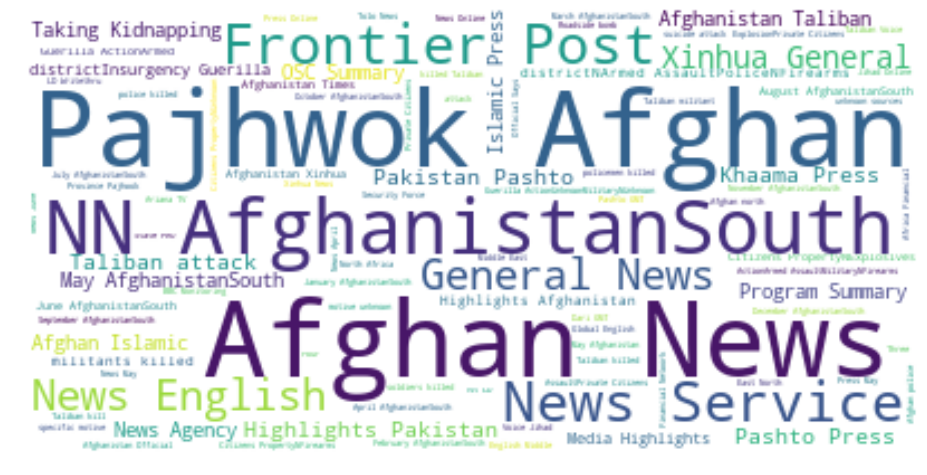

In [18]:
wc = WordCloud(background_color="white", max_words=5000,
               stopwords=STOPWORDS, max_font_size= 50)
# generate word cloud
wc.generate(" ".join(T))

# show
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

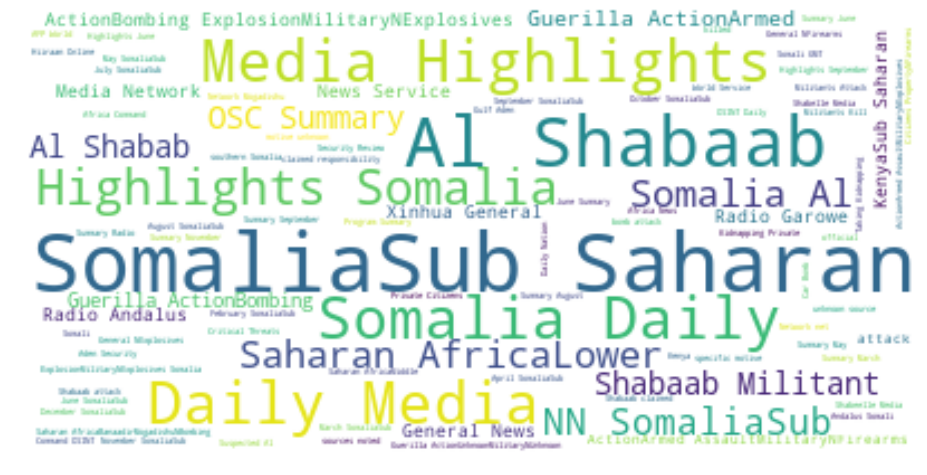

In [19]:
wc = WordCloud(background_color="white", max_words=5000,
               stopwords=STOPWORDS, max_font_size= 50)
# generate word cloud
wc.generate(" ".join(AS))

# show
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

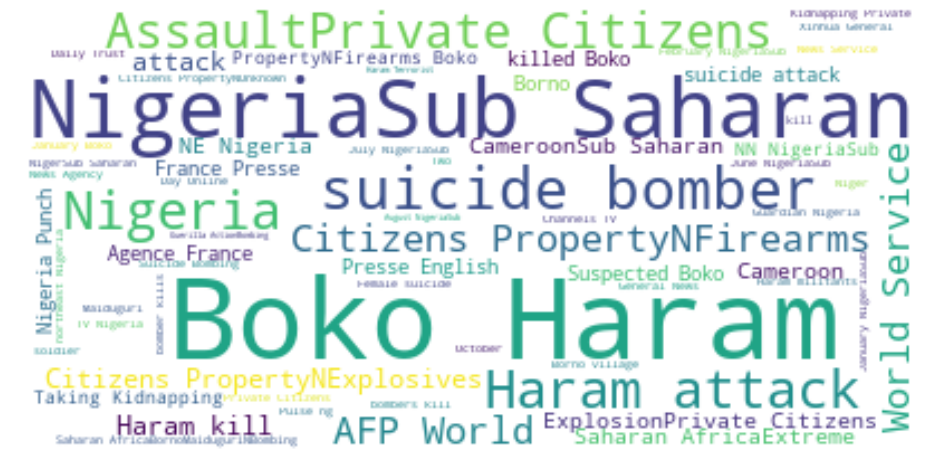

In [20]:
wc = WordCloud(background_color="white", max_words=5000,
               stopwords=STOPWORDS, max_font_size= 50)
# generate word cloud
wc.generate(" ".join(BH))

# show
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

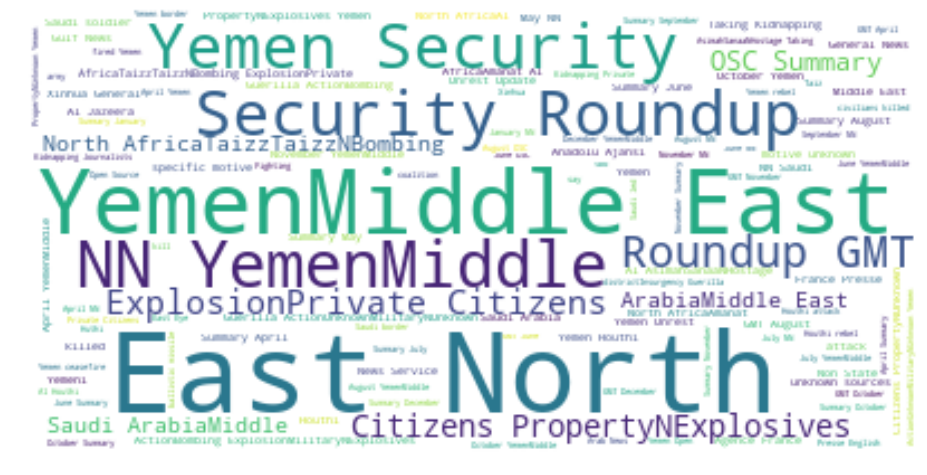

In [21]:
wc = WordCloud(background_color="white", max_words=5000,
               stopwords=STOPWORDS, max_font_size= 50)
# generate word cloud
wc.generate(" ".join(AA))

# show
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

第二问

#训练集

In [29]:
nlp_train = pd.read_csv('data/nlp_train.csv')

In [30]:
gname_list = ['Islamic State of Iraq and the Levant (ISIL)', 'Taliban', 'Al-Shabaab', 'Boko Haram', 'Houthi extremists (Ansar Allah)']

gnamelist = pd.DataFrame({"gname":gname_list})

need = pd.merge(gnamelist,nlp_train,on='gname',how='left')

train = pd.DataFrame({"eventid":need.eventid, "nlp":need.nlp, "gname":need.gname})

train

,eventid,gname,nlp
0,201303120031,Islamic State of Iraq and the Levant (ISIL),SyriaMiddle East & North AfricaIdlibAtmehNHost...
1,201304180002,Islamic State of Iraq and the Levant (ISIL),IraqMiddle East & North AfricaBaghdadBaghdadNB...
2,201304200018,Islamic State of Iraq and the Levant (ISIL),IraqMiddle East & North AfricaBabilLatifiyahNB...
3,201304200019,Islamic State of Iraq and the Levant (ISIL),IraqMiddle East & North AfricaBabilMahmudiyahN...
4,201304200020,Islamic State of Iraq and the Levant (ISIL),IraqMiddle East & North AfricaSaladinSamarraNB...
5,201305110007,Islamic State of Iraq and the Levant (ISIL),TurkeyMiddle East & North AfricaHatayReyhanliN...
6,201305110008,Islamic State of Iraq and the Levant (ISIL),TurkeyMiddle East & North AfricaHatayReyhanliN...
7,201305160006,Islamic State of Iraq and the Levant (ISIL),IraqMiddle East & North AfricaBaghdadBaghdadNB...
8,201305160007,Islamic State of Iraq and the Levant (ISIL),IraqMiddle East & North AfricaBaghdadBaghdadNB...
9,201305160008,Islamic State of Iraq and the Levant (ISIL),IraqMiddle East & North AfricaBaghdadBaghdadNB...


#测试集

In [24]:
nlp_data = pd.read_csv('data/nlp_data.csv')

In [28]:
event_list = [201701090031,201702210037,201703120023,201705050009,201705050010,201707010028,201707020006,201708110018,201711010006]

eventlist = pd.DataFrame({"eventid":event_list})

data_need = pd.merge(eventlist,nlp_data,on='eventid',how='left')

test = pd.DataFrame({"eventid":data_need.eventid, "nlp":data_need.nlp, "gname":data_need.gname})

test

,eventid,gname,nlp
0,201701090031,Unknown,IraqMiddle East & North AfricaSaladinTikritNBo...
1,201702210037,Unknown,AfghanistanSouth AsiaUruzganShah MansourNUnkno...
2,201703120023,Unknown,South SudanSub-Saharan AfricaWestern BiehUnkno...
3,201705050009,Unknown,South SudanSub-Saharan AfricaTerekekaSudan-Saf...
4,201705050010,Unknown,South SudanSub-Saharan AfricaTerekekaSudan-Saf...
5,201707010028,Unknown,Central African RepublicSub-Saharan AfricaNana...
6,201707020006,Unknown,SyriaMiddle East & North AfricaDamascusDamascu...
7,201708110018,Unknown,AfghanistanSouth AsiaFaryabTort AtaiNBombing/E...
8,201711010006,Unknown,AfghanistanSouth AsiaParwanCharikarNBombing/Ex...


In [31]:
data3 = pd.concat([train,test])

In [33]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(data3['nlp'])
train_x = tfidf.transform(train['nlp'])
test_x = tfidf.transform(test['nlp'])
print('tfidf prepared !')

tfidf prepared !


In [36]:
train_x

<19854x20322 sparse matrix of type '<class 'numpy.float64'>'
	with 655341 stored elements in Compressed Sparse Row format>

In [37]:
test_x

<9x20322 sparse matrix of type '<class 'numpy.float64'>'
	with 295 stored elements in Compressed Sparse Row format>

In [44]:
author_mapping_dict = {'Islamic State of Iraq and the Levant (ISIL)':0, 'Taliban':1, 'Al-Shabaab':2, 'Boko Haram':3, 'Houthi extremists (Ansar Allah)':4}
train_y = train['gname'].map(author_mapping_dict)

In [45]:
from sklearn import ensemble, metrics, model_selection, naive_bayes
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_x, train_y)
predictions = clf.predict_proba(train_x)

#print ("logloss: %0.4f " % multiclass_logloss(yvalid, predictions))
#print (metrics.log_loss(train_y, predictions))
cv_scores = []
cv_scores.append(metrics.log_loss(train_y, predictions))
print("Mean cv score : ", np.mean(cv_scores))

Mean cv score :  0.06691109865464862


In [48]:
print(1-np.mean(cv_scores))

0.9330889013453514


In [46]:
prediction = clf.predict_proba(test_x)
prediction

array([[9.99582817e-01, 3.50265581e-04, 3.56246095e-05, 2.96312242e-05,
        1.66125494e-06],
       [6.52118507e-03, 9.89877560e-01, 1.71463749e-03, 1.46737804e-03,
        4.19239755e-04],
       [2.58834400e-01, 4.10379077e-01, 2.35310410e-01, 8.42991323e-02,
        1.11769808e-02],
       [1.78329887e-01, 3.53056513e-01, 3.73017082e-01, 8.96366966e-02,
        5.95982060e-03],
       [1.78329887e-01, 3.53056513e-01, 3.73017082e-01, 8.96366966e-02,
        5.95982060e-03],
       [1.87939361e-01, 1.77611134e-01, 2.43620142e-01, 3.76120887e-01,
        1.47084769e-02],
       [9.84847758e-01, 9.27101702e-03, 4.80973751e-03, 1.02484581e-03,
        4.66412474e-05],
       [3.71283479e-01, 5.19543414e-01, 7.19205912e-02, 2.55247923e-02,
        1.17277230e-02],
       [4.38523354e-02, 9.43039614e-01, 6.92688745e-03, 5.84602339e-03,
        3.35140018e-04]])

In [47]:
out_df = pd.DataFrame(prediction)
out_df.columns = ['Islamic State of Iraq and the Levant (ISIL)', 'Taliban', 'Al-Shabaab', 'Boko Haram', 'Houthi extremists (Ansar Allah)']
out_df.insert(0, 'eventid', test['eventid'])
out_df.to_csv("data/out_2_3.csv", index=False)